<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230426.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timezone, time, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sales_data_with_stores.csv',
 'cookie_cats.csv',
 'bz_data_analyis.csv',
 '1_order_payments_dataset.csv',
 'lead_conversion.csv',
 'match_result_test.csv',
 'mock_sales_data.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'sales.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'sample-sales-data.csv',
 'ab_experiment.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 '1_customers_dataset.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'app_wau.csv',
 'sample_data']

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', a)).lower().lstrip('_') for a in df.columns]
df.head()

,customerid,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streamingtv        7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [6]:
df.isnull().sum()

customerid           0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streamingtv          0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [23]:
cnt_gender = df[['gender','senior_citizen','churn']].value_counts().reset_index(name = 'cnt')
cnt_gender['gender'] = cnt_gender['gender'].astype(str)
cnt_gender

,gender,senior_citizen,churn,cnt
0,Male,0,No,2287
1,Female,0,No,2221
2,Female,0,Yes,699
3,Male,0,Yes,694
4,Male,1,No,338
5,Female,1,No,328
6,Female,1,Yes,240
7,Male,1,Yes,236


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.


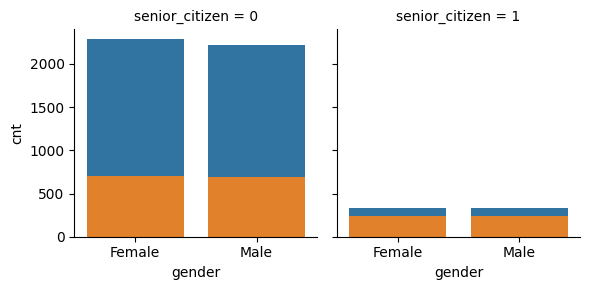

In [26]:
g = sns.FacetGrid(data = cnt_gender, col = 'senior_citizen', hue = 'churn')
g.map(sns.barplot, 'gender', 'cnt', dodge = True)
plt.show()

In [38]:
df['total_charges'][~df['total_charges'].str.contains('[0-1]')]

0         29.85
9       3487.95
10       587.45
11        326.8
17      7382.25
         ...   
7034    6886.25
7036      743.3
7039     7362.9
7040     346.45
7042     6844.5
Name: total_charges, Length: 2605, dtype: object

In [52]:
len_chk = pd.DataFrame({'charge':df['total_charges'], 'len' : [len(a) for a in df['total_charges']]})
len_chk.head()

,charge,len
0,29.85,5
1,1889.5,6
2,108.15,6
3,1840.75,7
4,151.65,6


In [53]:
len_chk[len_chk['len'] <= 1]

,charge,len
488,,1
753,,1
936,,1
1082,,1
1340,,1
3331,,1
3826,,1
4380,,1
5218,,1
6670,,1


In [55]:
df['total_charges']= [float(a) if len(a) > 1 else 0 for a in df['total_charges']]

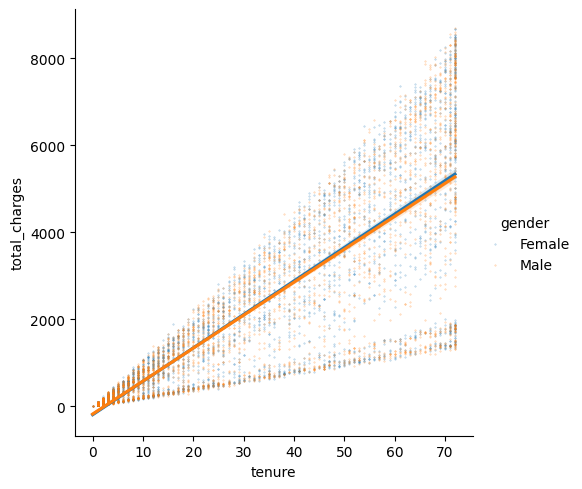

In [60]:
sns.lmplot(data = df, x = 'tenure', y = 'total_charges', hue = 'gender', scatter_kws = {'alpha' : .5, 's' : .1})
plt.show()

# Iterators

In [61]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [62]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [63]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}